<a href="https://colab.research.google.com/github/StockRecursiveOverflow/ML/blob/main/c3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test)  = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


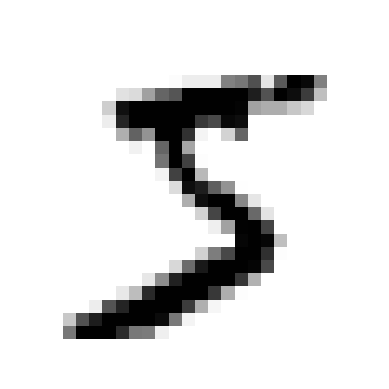

In [2]:
import matplotlib.pyplot as plt
some_digit = X_train[0]
plt.imshow(some_digit, cmap = "binary")
plt.axis("off")
plt.show()

In [3]:
y_train[0]

5

In [4]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [5]:
from sklearn.linear_model import SGDClassifier

X_train, X_test = X_train.reshape((-1, 784)), X_test.reshape((-1, 784))
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([X_train[0], X_train[1]])

array([ True, False])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [7]:
import numpy as np

num_fives = np.sum(y_train_5) + np.sum(y_test_5)
percentage_fives = (num_fives / (len(y_train_5)+len(y_test_5))) * 100

print(f"Percentage of 5s in the data set: {percentage_fives:.2f}%")

Percentage of 5s in the data set: 9.02%


In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [10]:
from sklearn.metrics import precision_score, recall_score

#precision: TP / (FP + TP)
#cm[1, 1] / (cm[0, 1] + cm[1, 1])
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [11]:
sgd_clf.decision_function([X_train[0]])

array([2164.22030239])

In [12]:
d_score = sgd_clf.decision_function([X_train[0]])
threshold = 0
#threshold = 3000
y_some_digit_pred = (d_score > threshold)
print(y_some_digit_pred)

[ True]


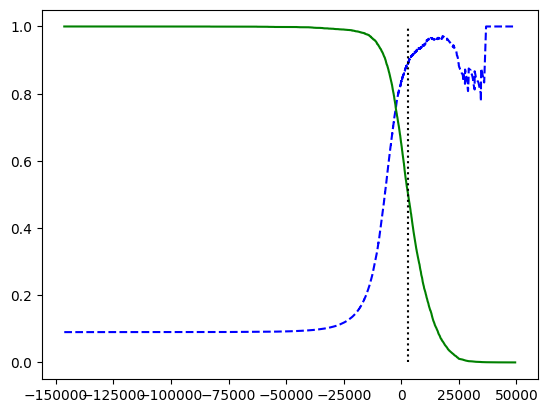

In [13]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
threshold = 3000
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

In [14]:
idx_for_95_precision = np.argmax(precisions >= 0.95)
threshold_95_precision = thresholds[idx_for_95_precision]
print(threshold_95_precision)

10480.508645329961


In [15]:
print(recalls[idx_for_95_precision])

0.20826415790444566


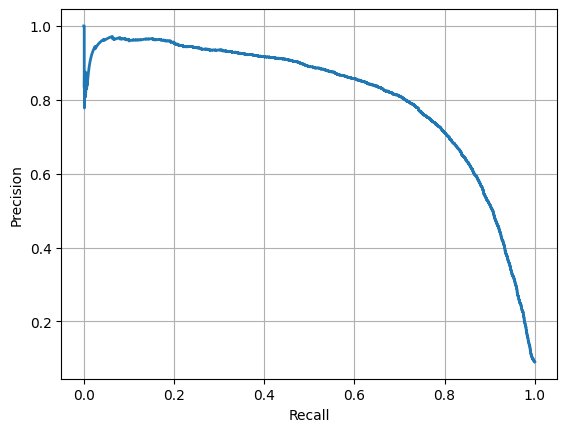

In [16]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

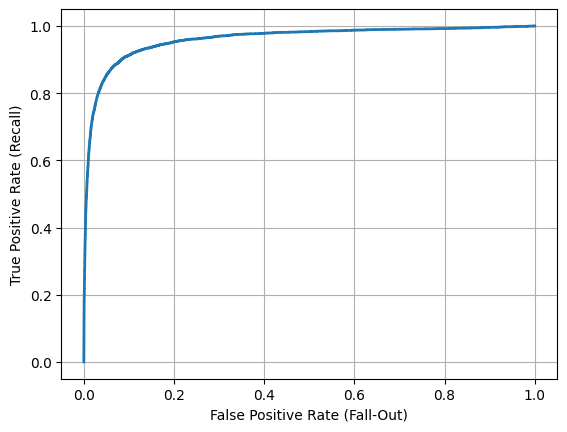

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

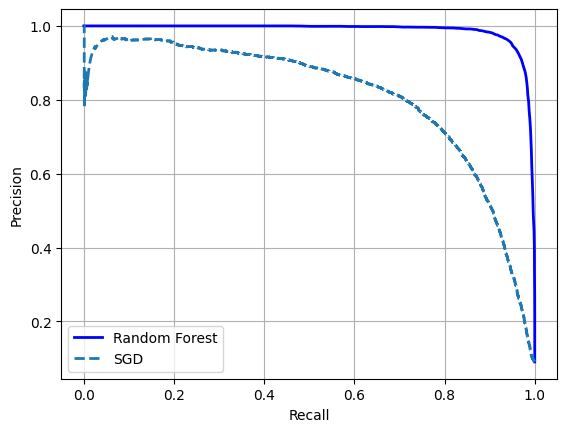

In [20]:
precisions_forest, recalls_forest, thresholds = precision_recall_curve(y_train_5, y_probas_forest[:, 1])
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])
svm_clf.predict([X_train[0]])

array([5], dtype=uint8)

In [22]:
svm_clf.decision_function([X_train[0]]).round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [23]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train[:2000], y_train[:2000])
sdg_clf.predict([X_train[0]])

array([5], dtype=uint8)

In [24]:
cross_val_score(sdg_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sdg_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sdg_clf, X_train_scaled, y_train, cv=3)

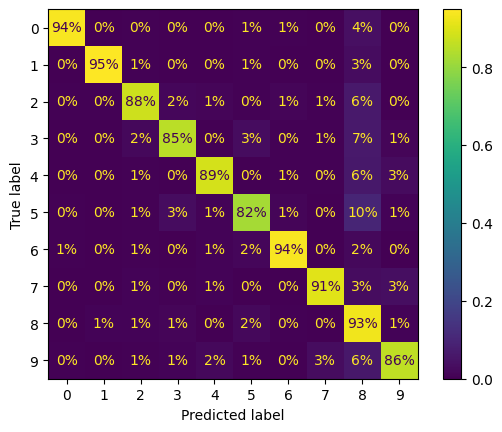

In [27]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [28]:
import numpy as np
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train, y_train_odd]

from itertools import chain
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([X_train[0]])

array([[5., 1.]])

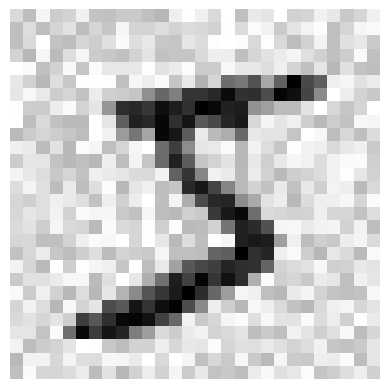

In [29]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

plt.imshow(X_train_mod[0].reshape(28, 28), cmap = "binary")
plt.axis("off")
plt.show()

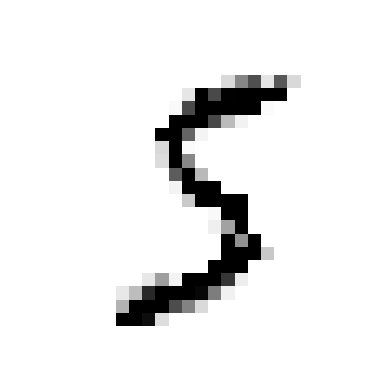

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, X_train)
clean_digit = knn_clf.predict([X_train_mod[0]])
plt.imshow(clean_digit.reshape(28, 28), cmap = "binary")
plt.axis("off")
plt.show()